In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make printing easier to read
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.precision', 4)

In [2]:
# Reproducible random data (already saved as CSV for reference)
from pathlib import Path

rng = np.random.default_rng(7)

# Load the prepared CSV so students can also download it if needed
df = pd.read_csv('/content/loan_toy_simple.csv')
df.head()

,salary_lakhs,loan_lakhs,approve
0,12.0015,1.2712,1
1,16.3554,12.9408,1
2,14.4110,16.0674,1
3,5.6033,10.7471,0
4,6.8027,14.7911,0


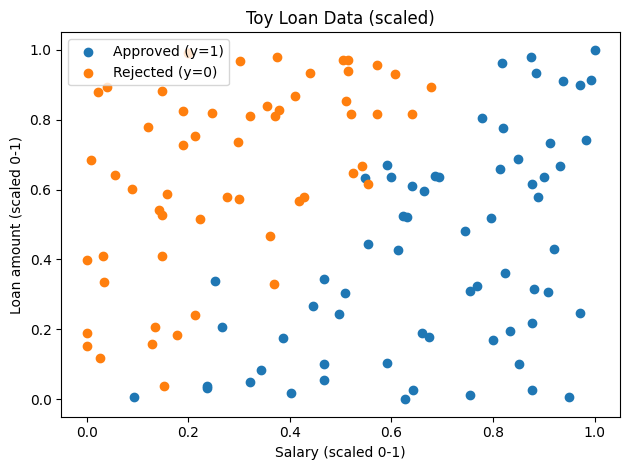

In [3]:
def minmax(a: np.ndarray):
    return (a - a.min()) / (a.max() - a.min())

salary = minmax(df['salary_lakhs'].values)
loan   = minmax(df['loan_lakhs'].values)
y      = df['approve'].values.astype(float)

X = np.column_stack([salary, loan])  # shape (n, 2)

# Quick scatter
plt.figure()
plt.scatter(X[y==1,0], X[y==1,1], label='Approved (y=1)')
plt.scatter(X[y==0,0], X[y==0,1], label='Rejected (y=0)')
plt.xlabel('Salary (scaled 0-1)')
plt.ylabel('Loan amount (scaled 0-1)')
plt.legend()
plt.title('Toy Loan Data (scaled)')
plt.tight_layout()
plt.show()

In [4]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def predict_proba(W, b, X):
    return sigmoid(X @ W + b)

def log_loss(p, y):
    eps = 1e-12
    p = np.clip(p, eps, 1-eps)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def gradients(W, b, X, y):
    p = predict_proba(W, b, X)
    diff = (p - y)        # shape (n,)
    dW = (X.T @ diff) / X.shape[0]
    db = np.mean(diff)
    return dW, db, p

In [11]:
rng = np.random.default_rng(0)
W = rng.normal(0, 0.01, size=2)
b = 0.0
lr = 1.0
epochs = 200

print('Initial W:', W)
print('Initial b:', b)

Initial W: [ 0.0013 -0.0013]
Initial b: 0.0


In [13]:
# Compute current loss and one GD step
dW, db, p = gradients(W, b, X, y)
before = log_loss(p, y)

W = W - lr * dW
b = b - lr * db

dW2, db2, p2 = gradients(W, b, X, y)
after = log_loss(p2, y)

print('dW (first step):', dW)
print('db (first step):', db)
print('loss before:', round(before, 4), ' -> loss after:', round(after, 4))
print('W after one step:', W, '  b:', round(b, 4))

dW (first step): [-0.1065  0.0488]
db (first step): -0.015536890563512573
loss before: 0.6771  -> loss after: 0.6636
W after one step: [ 0.2255 -0.0902]   b: 0.0489


In [14]:
hist = []
for ep in range(epochs):
    dW, db, p = gradients(W, b, X, y)
    loss = log_loss(p, y)
    hist.append((ep, W.copy(), b, loss))
    W -= lr * dW
    b -= lr * db
    if ep % 10 == 0 or ep == epochs-1:
        print(f'epoch {ep:3d} | loss={loss:.4f} | W={W} | b={b:.4f}')

# Save history as a small DataFrame
hist_df = pd.DataFrame({
    "epoch": [h[0] for h in hist],
    "w1": [h[1][0] for h in hist],
    "w2": [h[1][1] for h in hist],
    "b":  [h[2] for h in hist],
    "loss": [h[3] for h in hist],
})
hist_df.tail()

epoch   0 | loss=0.6636 | W=[ 0.3245 -0.1437] | b=0.0537
epoch  10 | loss=0.5608 | W=[ 1.1517 -0.6902] | b=-0.0333
epoch  20 | loss=0.4902 | W=[ 1.835  -1.1487] | b=-0.1307
epoch  30 | loss=0.4393 | W=[ 2.4191 -1.5324] | b=-0.2156
epoch  40 | loss=0.4013 | W=[ 2.9274 -1.8614] | b=-0.2902
epoch  50 | loss=0.3718 | W=[ 3.3767 -2.1497] | b=-0.3564
epoch  60 | loss=0.3483 | W=[ 3.7791 -2.4067] | b=-0.4155
epoch  70 | loss=0.3290 | W=[ 4.1436 -2.6391] | b=-0.4688
epoch  80 | loss=0.3129 | W=[ 4.4767 -2.8518] | b=-0.5171
epoch  90 | loss=0.2993 | W=[ 4.7837 -3.0481] | b=-0.5611
epoch 100 | loss=0.2876 | W=[ 5.0684 -3.2308] | b=-0.6015
epoch 110 | loss=0.2773 | W=[ 5.334 -3.402] | b=-0.6386
epoch 120 | loss=0.2683 | W=[ 5.583  -3.5632] | b=-0.6729
epoch 130 | loss=0.2603 | W=[ 5.8175 -3.7157] | b=-0.7048
epoch 140 | loss=0.2532 | W=[ 6.0391 -3.8605] | b=-0.7345
epoch 150 | loss=0.2467 | W=[ 6.2494 -3.9986] | b=-0.7623
epoch 160 | loss=0.2409 | W=[ 6.4495 -4.1307] | b=-0.7884
epoch 170 | loss=

,epoch,w1,w2,b,loss
195,195,7.0659,-4.5415,-0.8665,0.2240
196,196,7.0828,-4.5528,-0.8685,0.2236
197,197,7.0995,-4.5641,-0.8706,0.2232
198,198,7.1162,-4.5753,-0.8727,0.2228
199,199,7.1329,-4.5865,-0.8747,0.2224


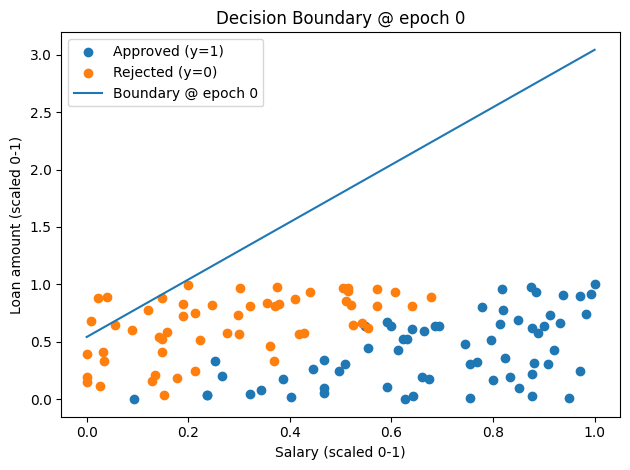

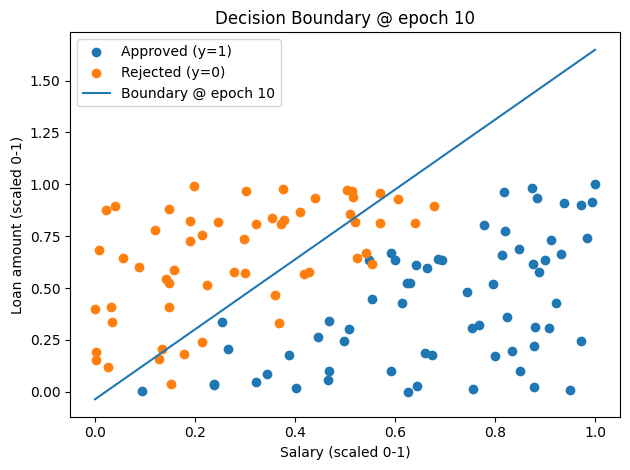

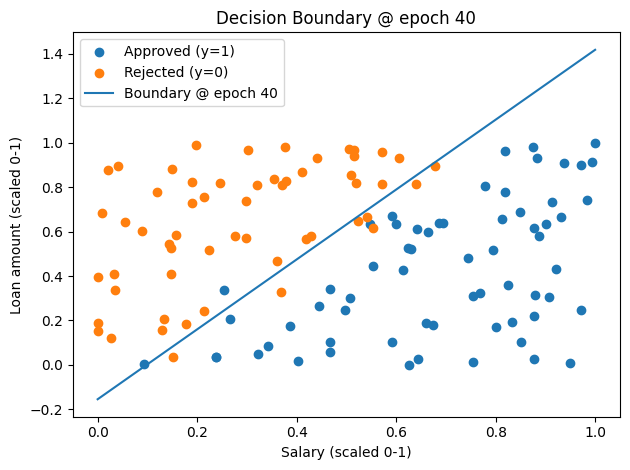

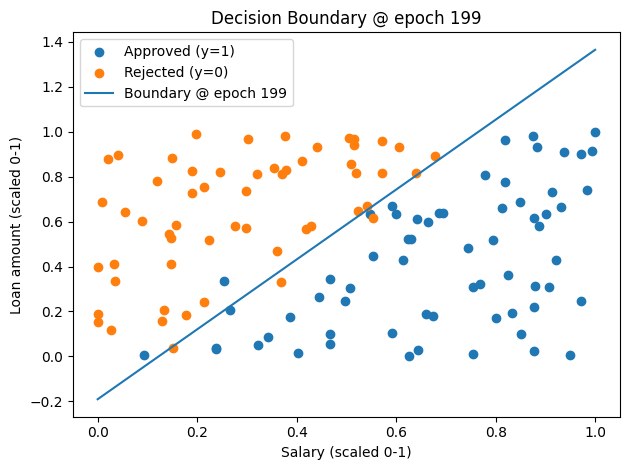

In [15]:
def boundary_points(w, b, x1_min=0.0, x1_max=1.0, num=200):
    x1 = np.linspace(x1_min, x1_max, num=num)
    if abs(w[1]) < 1e-12:
        x1_line = np.full_like(x1, -b/(w[0] if abs(w[0])>1e-12 else 1e-12))
        x2_line = np.linspace(0.0, 1.0, num=num)
        return x1_line, x2_line
    x2 = -(w[0]/w[1])*x1 - b/w[1]
    return x1, x2

# Show boundary at a few epochs (0, 10, 40, last)
snapshots = [0, 10, 40, hist_df['epoch'].iloc[-1]]
for ep in snapshots:
    row = hist_df.loc[hist_df['epoch']==ep].iloc[0]
    w = np.array([row['w1'], row['w2']])
    b_ep = row['b']
    x1_line, x2_line = boundary_points(w, b_ep)
    plt.figure()
    plt.scatter(X[y==1,0], X[y==1,1], label='Approved (y=1)')
    plt.scatter(X[y==0,0], X[y==0,1], label='Rejected (y=0)')
    plt.plot(x1_line, x2_line, label=f'Boundary @ epoch {ep}')
    plt.xlabel('Salary (scaled 0-1)')
    plt.ylabel('Loan amount (scaled 0-1)')
    plt.title(f'Decision Boundary @ epoch {ep}')
    plt.legend()
    plt.tight_layout()
    plt.show()

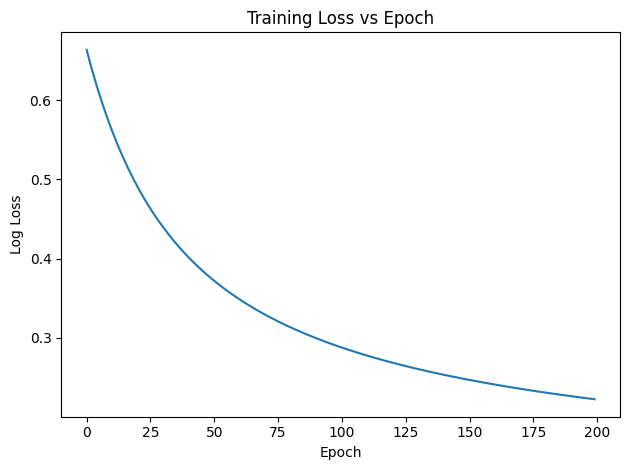

In [16]:
plt.figure()
plt.plot(hist_df['epoch'].values, hist_df['loss'].values)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss vs Epoch')
plt.tight_layout()
plt.show()

In [17]:
p_final = predict_proba(W, b, X)
y_pred  = (p_final >= 0.5).astype(int)
acc = (y_pred == y).mean()
print('Final W:', W, '  b:', round(b,4))
print(f'Training accuracy: {acc*100:.2f}%')

Final W: [ 7.1495 -4.5976]   b: -0.8768
Training accuracy: 95.83%
